In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('Data.csv') # import the data
data

# check for NULL values and if there are NULL values print the quantity
if not data.isnull().values.any():
    print('No NULL values')
else:
    cnt = data.isnull().sum()
    print('Number of NULL values: ' + str(cnt))
encodedData = pd.DataFrame(data)
encodedData['mainroad'] = encodedData['mainroad'].map({'yes': int(1) , 'no': int(0)})
encodedData['guestroom'] = encodedData['guestroom'].map({'yes': 1 , 'no': 0})
encodedData['basement'] = encodedData['basement'].map({'yes': 1 , 'no': 0})
encodedData['hotwaterheating'] = encodedData['hotwaterheating'].map({'yes': 1 , 'no': 0})
encodedData['airconditioning'] = encodedData['airconditioning'].map({'yes': 1 , 'no': 0})
encodedData['prefarea'] = encodedData['prefarea'].map({'yes': 1 , 'no': 0})
encodedData = pd.get_dummies(encodedData)
# Shuffle data
shuffledData = encodedData.sample(frac=1).reset_index(drop=True)

# Ensure all data is numeric and there are no missing values
numericData = shuffledData.select_dtypes(include=[np.number]).dropna()
numericData_np = numericData.to_numpy()

# Multivariate Outlier Detection using Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01)
outliers = iso_forest.fit_predict(numericData_np)
outlier_indices = (outliers == -1)
print(f'Number of identified outliers: {outlier_indices.sum()}/{len(numericData)}')

# Remove outliers from the dataset
numericData_clean = numericData[~outlier_indices]
numericData_clean.reset_index(drop=True, inplace=True)
print(f'Dataset size after outlier removal: {numericData_clean.shape[0]}')

# Optionally, view the cleaned data
print(numericData_clean)

No NULL values
Number of identified outliers: 6/545
Dataset size after outlier removal: 539
        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0     6790000  12090         4          2        2         1          0   
1     4403000   4880         3          1        1         1          0   
2     5600000   5500         3          2        2         1          0   
3    12250000   9960         3          2        2         1          0   
4     3780000   3600         2          1        1         1          0   
..        ...    ...       ...        ...      ...       ...        ...   
534   7420000   6325         3          1        4         1          0   
535   4270000   7770         2          1        1         1          0   
536   4767000   3420         4          2        2         1          0   
537   3290000   2500         2          1        1         0          0   
538   3395000   3450         3          1        1         1          0   

     ba

In [3]:
train1=numericData_clean.sample(frac=0.9,random_state=90)
test1=numericData_clean.drop(train1.index)
train2=numericData_clean.sample(frac=0.9,random_state=80)
test2=numericData_clean.drop(train2.index)
train3=numericData_clean.sample(frac=0.9,random_state=70)
test3=numericData_clean.drop(train3.index)
train4=numericData_clean.sample(frac=0.9,random_state=60)
test4=numericData_clean.drop(train4.index)
train5=numericData_clean.sample(frac=0.9,random_state=50)
test5=numericData_clean.drop(train5.index)
train6=numericData_clean.sample(frac=0.9,random_state=40)
test6=numericData_clean.drop(train6.index)
train7=numericData_clean.sample(frac=0.9,random_state=30)
test7=numericData_clean.drop(train7.index)
train8=numericData_clean.sample(frac=0.9,random_state=20)
test8=numericData_clean.drop(train8.index)
train9=numericData_clean.sample(frac=0.9,random_state=10)
test9=numericData_clean.drop(train9.index)
train10=numericData_clean.sample(frac=0.9,random_state=0)
test10=numericData_clean.drop(train10.index)

In [25]:
train1.to_csv('data/train1.csv')
test1.to_csv('data/test1.csv')
train2.to_csv('data/train2.csv')
test2.to_csv('data/test2.csv')
train3.to_csv('data/train3.csv')
test3.to_csv('data/test3.csv')
train4.to_csv('data/train4.csv')
test4.to_csv('data/test4.csv')
train5.to_csv('data/train5.csv')
test5.to_csv('data/test5.csv')
train6.to_csv('data/train6.csv')
test6.to_csv('data/test6.csv')
train7.to_csv('data/train7.csv')
test7.to_csv('data/test7.csv')
train8.to_csv('data/train8.csv')
test8.to_csv('data/test8.csv')
train9.to_csv('data/train9.csv')
test9.to_csv('data/test9.csv')
train10.to_csv('data/train10.csv')
test10.to_csv('data/test10.csv')
numericData_clean.to_csv('data/numericData_clean.csv')


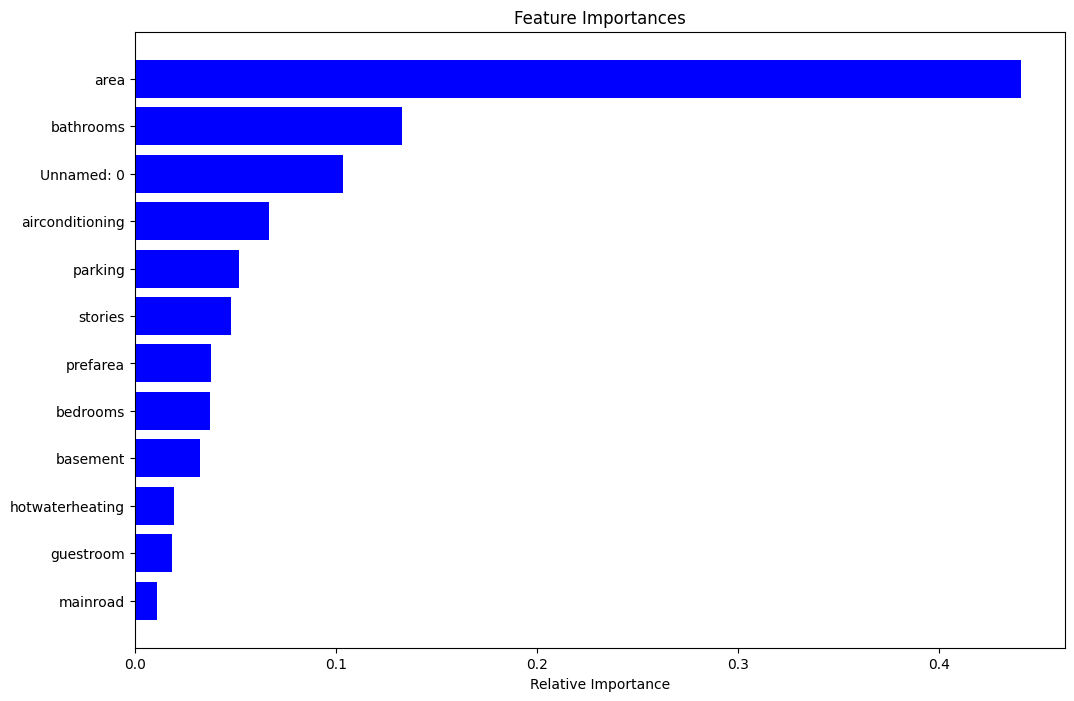

Estimated price: $ 8298500.0


In [41]:
# Function to estimate house price
def estimate_house_price(properties, model, feature_columns):
    # Preparing the input data for prediction
    input_data = pd.DataFrame([properties], columns=feature_columns)
    input_data = input_data.fillna(0)  # Handling any missing columns

    # Predicting the price
    estimated_price = model.predict(input_data)[0]
    return estimated_price


train_data = pd.read_csv('./data/numericData_clean.csv')
test_data = pd.read_csv('./data/test1.csv')

# Preparing the data
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Example usage of the function
example_properties = {
    'area': 12090, 
    'bedrooms': 4, 
    'bathrooms': 2, 
    'stories': 2, 
    'mainroad': 1, 
    'guestroom': 0, 
    'basement': 0, 
    'hotwaterheating': 0, 
    'airconditioning': 0, 
    'parking': 2, 
    'prefarea': 1
}

estimated_price = estimate_house_price(example_properties, rf_model, X_train.columns)
print("Estimated price: $", estimated_price)